# Dataset links:
1. https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
2. https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset

# Discussions
1. Should we just use the IBM dataset or the second set or combine them
2. How do we use Gen-AI in this project?
3. EDA
4. Features
5. Dimension reduction?
6. Classification
7. NN / DL: Are we gonna use supervised learning or NN/DL
8. Deployment

In [2]:
%pip install matplotlib seaborn pandas numpy openai scikit-learn fastapi streamlit dotenv pydantic requests
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu130

Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cu130
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from openai import OpenAI
from pydantic import BaseModel

In [4]:
# load OpenAI API key


OPENAI_API_KEY = ''
try:
	from google.colab import userdata
	print("Running in Google Colab")
	OPENAI_API_KEY = userdata.get('OPENAI_API_KEY', '')
except ImportError:
	import dotenv
	dotenv.load_dotenv()
	print("Running locally")
	OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY', '')

openai = OpenAI(api_key=OPENAI_API_KEY)
try:
	response = openai.models.list()
	print("Available models:", response.data)
	print("OpenAI API key is valid.")
except Exception as e:
	print("Error with OpenAI API key:", e)

Running locally
Available models: [Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-preview', created=1734387380, object='model', owned_by='system'), Model(id='gpt-5-nano', created=1754426384, object='model', owned_by='system'), Model(id='text-embedding-ada-002', created=1671217299, object='model', owned_by='openai-internal')]
OpenAI API key is valid.


In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.shape

(1470, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# convert 'Attrition' to binary classes: Yes=1, No=0
df["Attrition_Binary"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Convert 'MaritalStatus' to numerical classes: Married=1, Single=0, Divorced=2
df["Marital_Status_Class"] = df["MaritalStatus"].apply(lambda x: 1 if x == "Married" else (0 if x == "Single" else 2))

# Convert 'Gender' to binary classes: Male=1, Female=0
df["Gender_Binary"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)


# convert 'OverTime' to binary classes: Yes=1, No=0
df["OverTime_Binary"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

# convert 'BusinessTravel' to numerical classes: Non-Travel=0, Travel_Rarely=1, Travel_Frequently=2
df["Business_Travel_Class"] = df["BusinessTravel"].apply(lambda x: 0 if x == "Non-Travel" else (1 if x == "Travel_Rarely" else 2))

display(df.head(10))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Marital_Status_Class,Gender_Binary,OverTime_Binary,Business_Travel_Class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,6,4,0,5,1,0,0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,10,7,1,7,0,1,1,0,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,0,0,0,0,1,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,8,7,3,0,0,1,0,1,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,2,2,2,2,0,1,1,0,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,2,7,7,3,6,0,0,1,0,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,2,1,0,0,0,0,1,0,1,1
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,3,1,0,0,0,0,2,1,0,1
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,3,9,7,1,8,0,0,1,0,2
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,7,7,7,7,0,1,1,0,1


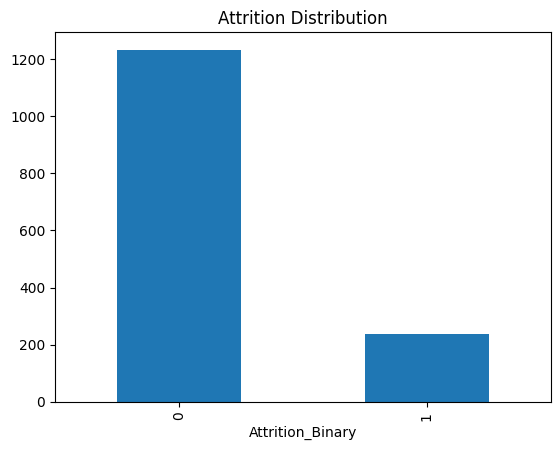

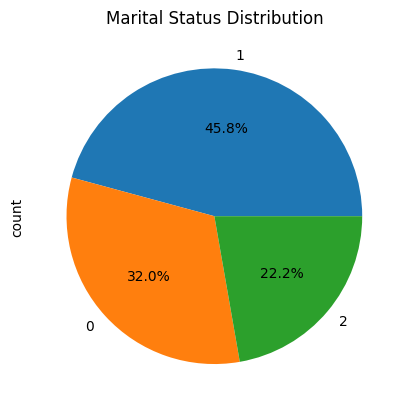

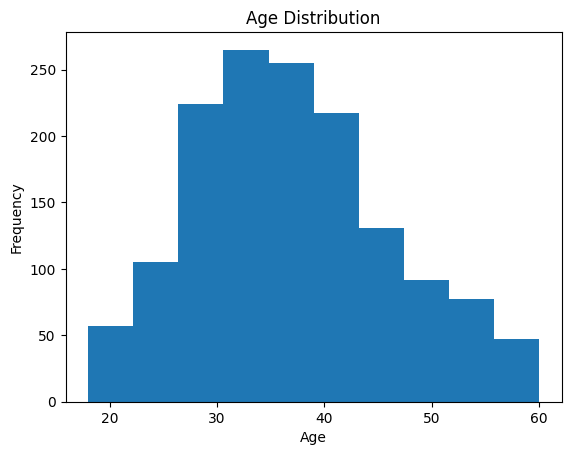

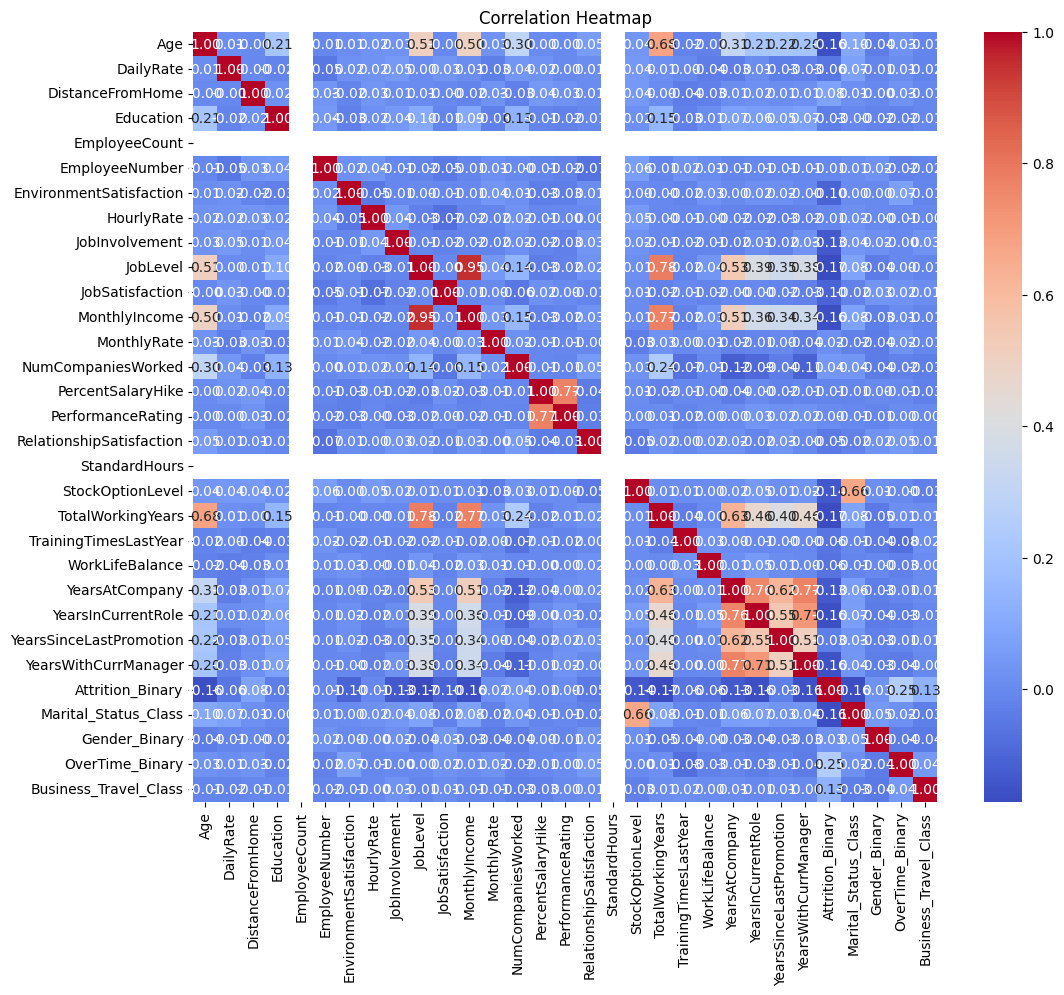

In [10]:

df['Attrition_Binary'].value_counts().plot(kind='bar')
plt.title('Attrition Distribution')
plt.show()

# TODO : Plot a pie chart for Marital Status distribution
df['Marital_Status_Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

# TODO : Plot a histogram for Age distribution
df['Age'].plot(kind='hist', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Correlation heatmap for numerical features
import seaborn as sns
plt.figure(figsize=(12,10))
correlation_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Marital_Status_Class,Gender_Binary,OverTime_Binary,Business_Travel_Class
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,0.902721,0.600000,0.282993,1.086395
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,0.730121,0.490065,0.450606,0.532170
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,2.000000,1.000000,1.000000,2.000000


# Experiment with Gen-AI

In [19]:
# TODO: Use OpenAI API to generate insights from the dataset

from IPython.display import Markdown, display

system_prompt = """You are a data analyst. Given the summary statistics of a dataset, provide insights about the data."""
user_prompt = f"""Here are the summary statistics of the dataset:
{df.describe().to_string()}
Provide insights about the data."""
response = openai.chat.completions.create(
	model="gpt-4o-mini",
	messages=[
		{"role": "system", "content": system_prompt},
		{"role": "user", "content": user_prompt}
	]
)
print("AI-generated insights:")
display(Markdown(response.choices[0].message.content))

AI-generated insights:


Based on the summary statistics provided for the dataset, here are several insightful observations that can be drawn out:

1. **Age Distribution**:
   - The average age of employees is approximately 36.9 years, with a standard deviation of 9.1 years, indicating that most employees are in their mid-30s to early 40s.
   - The minimum age is 18, and the maximum is 60, suggesting a diverse age range within the workforce.

2. **Income Insights**:
   - The mean monthly income is approximately $6,503, while the maximum income reaches up to $19,999. This wide range, along with a substantial standard deviation of $4,708, indicates significant income disparity among employees.
   - The median (50th percentile) monthly income is $4,919, which is notably lower than the mean, suggesting that the income distribution may be right-skewed with a few high earners inflating the average.

3. **Job Satisfaction and Involvement**:
   - Job satisfaction averages at around 2.73 on a scale from 1 to 5, indicating generally low to moderate job satisfaction. This low level could be a cause for concern for management, especially when considering employee retention.
   - Job involvement is also moderately low (average = 2.73), which may correlate with the observed job satisfaction levels.

4. **Work-Life Balance and Relationships**:
   - The average for work-life balance is nearly 3 (2.76), while relationship satisfaction averages at 2.71. Both metrics suggest room for improvement in striving for a better work environment and employee happiness.

5. **Distance from Home**:
   - Employees commute an average distance of about 9.2 miles from home, with some commute distances reaching 29 miles. This insight could be valuable in examining the impact of commute on employee satisfaction and productivity.

6. **Employee Turnover**:
   - The dataset indicates an attrition binary variable. Given the average values for job satisfaction and work-life balance, and without direct statistics on attrition rates, one might hypothesize that increasing job satisfaction and work-life balance could potentially reduce turnover.

7. **Company Tenure**:
   - Employees have an average of 11.28 total years of work experience, with 7.01 years spent at the current company. The statistics also show that many employees have remained in their current role for several years, indicating some degree of stability within the organization.

8. **Education**:
   - Most employees hold at least a Bachelor's degree with the education levels ranging from 1 to 5 (with mean at 2.91) indicating a mix of qualifications. This diversity in educational background might influence job roles and performance ratings.

9. **Performance Ratings**:
   - The average performance rating is 3.15 with all ratings useful for evaluating managerial effectiveness and employee performance in relation to job satisfaction.

10. **Training Opportunities**:
    - The average training times last year is around 2.8, suggesting that training is provided; however, understanding its impact on job satisfaction could be further analyzed.

11. **Diversity in Work Styles**:
    - There is a significant number of employees working overtime (60% in the overtime binary). Understanding how this affects job satisfaction and employee burnout might offer insights into improving workplace dynamics.

In conclusion, the snapshot provided by the summary statistics indicates opportunities for companies to enhance job satisfaction, employee retention, and potentially improve overall productivity through targeted interventions in employee support, engagement, and satisfaction. Improvements in those areas might also lead to a reduction in turnover, ultimately benefiting the company in terms of stability and performance.

In [13]:
# TODO: To use OpenAI for feature selection or engineering and return the results as a list

class FeatureSuggestions(BaseModel):
    important_features: list[str]
    reasoning: str

system_prompt_fs = """You are a feature engineering expert.
Return your answer as a JSON object like this:
{
  "important_features": ["feature1", "feature2"],
  "reasoning": "short explanation"
}"""
user_prompt_fs = f"""Here are the summary statistics of the dataset:
{df.describe().to_string()}
Suggest the top 10 most important features for predicting employee attrition."""
response_fs = openai.chat.completions.create(
	model="gpt-4o-mini",
 	response_format={"type": "json_object"},
	temperature=0.5,
	messages=[
		{"role": "system", "content": system_prompt_fs},
		{"role": "user", "content": user_prompt_fs}
	]
)
response_json = response_fs.choices[0].message.content
parsed = FeatureSuggestions.model_validate_json(response_json)

# 5️⃣ Use safely
print(parsed.model_dump_json(indent=2))
print("Important features:", parsed.important_features)

{
  "important_features": [
    "JobSatisfaction",
    "MonthlyIncome",
    "DistanceFromHome",
    "YearsAtCompany",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "WorkLifeBalance",
    "PerformanceRating",
    "Age",
    "OverTime_Binary"
  ],
  "reasoning": "These features are likely to influence employee satisfaction and commitment, which are critical factors in predicting attrition. Job satisfaction and income directly affect employee morale, while distance from home can impact work-life balance. Additionally, the number of years at the company and the level of satisfaction in various aspects of the job are strong indicators of retention likelihood."
}
Important features: ['JobSatisfaction', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'PerformanceRating', 'Age', 'OverTime_Binary']


In [14]:
# # TODO: Use Openai API to perform EDA, will need to perform function calling

# import json


# # Define functions that the AI can call
# def check_missing_data(df_name="df"):
#     """Check for missing data in the dataset"""
#     missing = df.isna().sum()
#     missing_pct = (df.isna().sum() / len(df)) * 100
#     result = pd.DataFrame({
#         'Missing_Count': missing,
#         'Missing_Percentage': missing_pct
#     })
#     result = result[result['Missing_Count'] > 0]
    
#     if len(result) == 0:
#         return "No missing data found in the dataset."
#     else:
#         return f"Missing data summary:\n{result.to_string()}"

# def plot_visualization(plot_type, column_name, title=None, bins=20):
#     """Create a visualization for the specified column"""
#     try:
#         if plot_type == "histogram":
#             plt.figure(figsize=(10, 6))
#             df[column_name].plot(kind='hist', bins=bins, edgecolor='black')
#             plt.title(title or f'Histogram of {column_name}')
#             plt.xlabel(column_name)
#             plt.ylabel('Frequency')
#             plt.grid(axis='y', alpha=0.3)
#             plt.show()
#             return f"Created histogram for {column_name}"
            
#         elif plot_type == "bar":
#             plt.figure(figsize=(10, 6))
#             df[column_name].value_counts().plot(kind='bar', edgecolor='black')
#             plt.title(title or f'Bar Chart of {column_name}')
#             plt.xlabel(column_name)
#             plt.ylabel('Count')
#             plt.xticks(rotation=45)
#             plt.grid(axis='y', alpha=0.3)
#             plt.show()
#             return f"Created bar chart for {column_name}"
            
#         elif plot_type == "pie":
#             plt.figure(figsize=(10, 6))
#             df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%')
#             plt.title(title or f'Pie Chart of {column_name}')
#             plt.ylabel('')
#             plt.show()
#             return f"Created pie chart for {column_name}"
            
#         elif plot_type == "box":
#             plt.figure(figsize=(10, 6))
#             df.boxplot(column=column_name)
#             plt.title(title or f'Box Plot of {column_name}')
#             plt.ylabel(column_name)
#             plt.grid(axis='y', alpha=0.3)
#             plt.show()
#             return f"Created box plot for {column_name}"
            
#         elif plot_type == "scatter":
#             # For scatter, column_name should be "column1,column2"
#             cols = column_name.split(',')
#             if len(cols) == 2:
#                 plt.figure(figsize=(10, 6))
#                 plt.scatter(df[cols[0]], df[cols[1]], alpha=0.5)
#                 plt.xlabel(cols[0])
#                 plt.ylabel(cols[1])
#                 plt.title(title or f'Scatter Plot: {cols[0]} vs {cols[1]}')
#                 plt.grid(alpha=0.3)
#                 plt.show()
#                 return f"Created scatter plot for {cols[0]} vs {cols[1]}"
#             else:
#                 return "Error: Scatter plot requires two columns separated by comma"
#         else:
#             return f"Error: Unknown plot type '{plot_type}'"
#     except Exception as e:
#         return f"Error creating {plot_type} for {column_name}: {str(e)}"

# def encode_categorical_column(column_name, mapping_dict):
#     """
#     Encode a categorical column to numerical values
#     mapping_dict should be like: {"Yes": 1, "No": 0}
#     """
#     try:
#         new_column_name = f"{column_name}_Encoded"
#         df[new_column_name] = df[column_name].map(mapping_dict)
        
#         # Check if any values were not mapped
#         unmapped = df[df[new_column_name].isna()][column_name].unique()
#         if len(unmapped) > 0:
#             return f"Warning: Column '{column_name}' encoded to '{new_column_name}', but values {unmapped.tolist()} were not in mapping"
        
#         return f"Successfully encoded '{column_name}' to '{new_column_name}' with mapping: {mapping_dict}"
#     except Exception as e:
#         return f"Error encoding {column_name}: {str(e)}"

# def get_column_info(column_name=None):
#     """Get information about columns in the dataset"""
#     if column_name:
#         if column_name in df.columns:
#             unique_vals = df[column_name].unique()
#             return f"Column '{column_name}':\n- Type: {df[column_name].dtype}\n- Unique values ({len(unique_vals)}): {unique_vals.tolist()[:20]}\n- Sample data: {df[column_name].head(5).tolist()}"
#         else:
#             return f"Column '{column_name}' not found in dataset"
#     else:
#         return f"Available columns:\n{df.columns.tolist()}\n\nData types:\n{df.dtypes.to_string()}"

# # Define function schemas for OpenAI
# functions = [
#     {
#         "name": "check_missing_data",
#         "description": "Check for missing data in the dataset and return a summary",
#         "parameters": {
#             "type": "object",
#             "properties": {
#                 "df_name": {
#                     "type": "string",
#                     "description": "Name of the dataframe (default: 'df')"
#                 }
#             }
#         }
#     },
#     {
#         "name": "plot_visualization",
#         "description": "Create a visualization (histogram, bar, pie, box, or scatter plot) for a specified column",
#         "parameters": {
#             "type": "object",
#             "properties": {
#                 "plot_type": {
#                     "type": "string",
#                     "enum": ["histogram", "bar", "pie", "box", "scatter"],
#                     "description": "Type of plot to create"
#                 },
#                 "column_name": {
#                     "type": "string",
#                     "description": "Name of the column to plot. For scatter plots, use 'column1,column2' format"
#                 },
#                 "title": {
#                     "type": "string",
#                     "description": "Optional title for the plot"
#                 },
#                 "bins": {
#                     "type": "integer",
#                     "description": "Number of bins for histogram (default: 20)"
#                 }
#             },
#             "required": ["plot_type", "column_name"]
#         }
#     },
#     {
#         "name": "encode_categorical_column",
#         "description": "Encode a categorical column to numerical values using a provided mapping dictionary",
#         "parameters": {
#             "type": "object",
#             "properties": {
#                 "column_name": {
#                     "type": "string",
#                     "description": "Name of the column to encode"
#                 },
#                 "mapping_dict": {
#                     "type": "object",
#                     "description": "Dictionary mapping categorical values to numbers, e.g., {'Yes': 1, 'No': 0}"
#                 }
#             },
#             "required": ["column_name", "mapping_dict"]
#         }
#     },
#     {
#         "name": "get_column_info",
#         "description": "Get information about columns in the dataset, including data types and unique values",
#         "parameters": {
#             "type": "object",
#             "properties": {
#                 "column_name": {
#                     "type": "string",
#                     "description": "Name of specific column to inspect. If not provided, returns info about all columns"
#                 }
#             }
#         }
#     }
# ]

# # Map function names to actual functions
# available_functions = {
#     "check_missing_data": check_missing_data,
#     "plot_visualization": plot_visualization,
#     "encode_categorical_column": encode_categorical_column,
#     "get_column_info": get_column_info
# }

# print("✅ EDA functions and schemas defined successfully!")
# print(f"Available functions: {list(available_functions.keys())}")



In [15]:
# # Execute OpenAI-powered EDA with function calling

# # Create the initial prompt
# system_prompt_eda = """You are a data analyst assistant. You have access to functions to perform EDA on an employee attrition dataset.

# Your task is to:
# 1. Check for missing data in the dataset
# 2. Create at least 4 different visualizations to explore the data (choose appropriate plot types for different columns)
# 3. Identify and encode categorical columns that need to be converted to numerical values for machine learning

# Use the available functions to accomplish these tasks. Call get_column_info first to understand the dataset structure."""

# user_prompt_eda = """Please perform comprehensive EDA on the employee attrition dataset. 
# First, check what columns are available, then check for missing data, create insightful visualizations, 
# and finally encode any remaining categorical columns that haven't been encoded yet."""

# # Initialize conversation
# messages = [
#     {"role": "system", "content": system_prompt_eda},
#     {"role": "user", "content": user_prompt_eda}
# ]

# print("🤖 Starting AI-powered EDA with function calling...\n")
# print("=" * 80)

# # Run the conversation loop
# max_iterations = 15  # Prevent infinite loops
# iteration = 0

# while iteration < max_iterations:
#     iteration += 1
#     print(f"\n--- Iteration {iteration} ---")
    
#     # Make API call
#     response = openai.chat.completions.create(
#         model="gpt-4o-mini",
#         messages=messages,
#         tools=[{"type": "function", "function": func} for func in functions],
#         tool_choice="auto"
#     )
    
#     response_message = response.choices[0].message
#     messages.append(response_message)
    
#     # Check if the model wants to call functions
#     tool_calls = response_message.tool_calls
    
#     if not tool_calls:
#         # No more function calls - the assistant has finished
#         print("\n✅ AI Assistant finished:")
#         print(response_message.content)
#         break
    
#     # Process each function call
#     for tool_call in tool_calls:
#         function_name = tool_call.function.name
#         function_args = json.loads(tool_call.function.arguments)
        
#         print(f"\n🔧 Calling function: {function_name}")
#         print(f"   Arguments: {function_args}")
        
#         # Call the actual function
#         function_to_call = available_functions[function_name]
#         function_response = function_to_call(**function_args)
        
#         print(f"   Result: {function_response[:200]}..." if len(str(function_response)) > 200 else f"   Result: {function_response}")
        
#         # Add function response to messages
#         messages.append({
#             "role": "tool",
#             "tool_call_id": tool_call.id,
#             "name": function_name,
#             "content": str(function_response)
#         })

# print("\n" + "=" * 80)
# print("✅ EDA completed!")
# print(f"\nTotal iterations: {iteration}")
# print(f"Check the visualizations above and the new encoded columns in the dataframe.")


In [16]:
# # Display the updated dataframe with newly encoded columns
# print("\n📊 Updated DataFrame Info:")
# print(f"Shape: {df.shape}")
# print(f"\nColumns: {df.columns.tolist()}")
# print("\n" + "=" * 80)
# print("\nFirst few rows with all columns (including newly encoded):")
# df.head(10)


In [23]:
# TODO: Use OpenAI API to suggest Machine Learning models based on the dataset and suggest starting parameters
from pydantic import BaseModel, Field
from typing import Optional

class ModelSuggestion(BaseModel):
	model_name: str = Field(description="Name of the suggested machine learning model")
	parameters: dict = Field(description="Suggested starting parameters for the model")
	reasoning: str = Field(description="Reasoning behind the model choice and parameters")

model_suggestion_schema = {
    "name": "ModelSuggestion",
    "schema": ModelSuggestion.model_json_schema()
}

system_prompt_ml = """You are a machine learning expert. Based on the dataset provided, suggest an appropriate machine learning model for predicting employee attrition along with starting parameters.
Return your answer based on the following JSON schema:
{
  "model_name": "string",
  "parameters": {"type": "object"},
  "reasoning": "string"
}"""

user_prompt_ml = f"""Here are the summary statistics of the dataset:
{df.describe().to_string()}
Suggest an appropriate machine learning model for predicting employee attrition along with starting parameters."""
response_ml = openai.chat.completions.create(
	model="gpt-4o-mini",
 	response_format={"type": "json_schema", "json_schema": model_suggestion_schema},
	temperature=0.5,
	messages=[
		{"role": "system", "content": system_prompt_ml},
		{"role": "user", "content": user_prompt_ml}
	]
)
response_json_ml = response_ml.choices[0].message.content
parsed_ml = ModelSuggestion.model_validate_json(response_json_ml)

print("✅ Machine Learning Model Suggestion:")
print(parsed_ml.model_dump_json(indent=2))

✅ Machine Learning Model Suggestion:
{
  "model_name": "RandomForestClassifier",
  "parameters": {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "random_state": 42
  },
  "reasoning": "The Random Forest Classifier is suitable for predicting employee attrition due to its ability to handle both numerical and categorical features effectively. Given the dataset contains various features such as age, income, job satisfaction, and several categorical variables, Random Forest can capture complex interactions between these features. The suggested starting parameters include 100 trees (n_estimators) for a robust model, a maximum depth of 10 to prevent overfitting, and minimum samples split and leaf parameters set to default values to ensure the model is flexible yet controlled. Additionally, setting a random state ensures reproducibility."
}
